In [2]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt


In [4]:
from scipy.stats import norm
import math

In [12]:
# population parameter
mu = 15
sigma = 2

# generate toy sample
N = 100
np.random.seed(1)
data = norm.rvs(mu, sigma, size=N)
print(data)
print(np.mean(data))
print(np.var(data))
xbar = np.mean(data)
lmda = 1/np.var(data)

[18.249 13.776 13.944 12.854 16.731 10.397 18.49  13.478 15.638 14.501
 17.924 10.88  14.355 14.232 17.268 12.8   14.655 13.244 15.084 16.166
 12.799 17.289 16.803 16.005 16.802 13.633 14.754 13.128 14.464 16.061
 13.617 14.206 13.626 13.31  13.658 14.975 12.765 15.469 18.32  16.484
 14.616 13.225 13.506 18.385 15.102 13.726 15.382 19.201 15.24  16.234
 15.6   14.296 12.715 14.301 14.582 16.173 16.678 16.862 15.571 16.77
 13.491 17.506 16.026 14.404 15.977 14.849 17.263 18.04  19.371 12.207
 12.112 13.991 15.32  16.752 15.631 10.956 14.388 16.656 15.46  16.524
 14.555 14.598 15.373 15.82  15.397 15.238 13.659 15.755 15.244 17.259
 17.398 15.37  14.249 13.723 15.847 15.155 14.312 15.087 13.76  16.396]
15.1211657041514
3.134006091538667


Text(0.5, 0, 'mu')

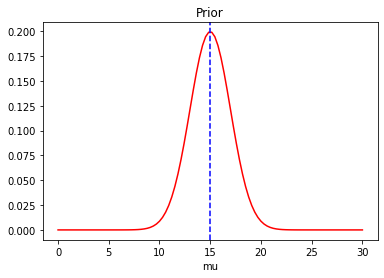

In [14]:
#choose your belief parameter
mu0, lmda_mu0 = 15, 0.5
prior = norm(loc=mu0, scale=1/lmda_mu0)
theta = np.linspace(0,30,100)
plt.plot(theta, prior.pdf(theta), 'r')
plt.axvline(15, color='b', linestyle='--')
plt.title("Prior")
plt.xlabel("mu")

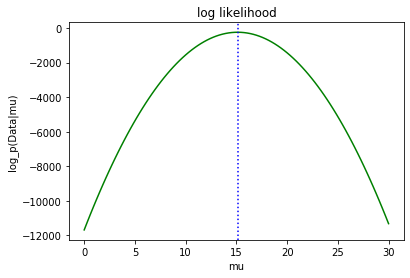

In [16]:
def likelihood(x, mu):
    j_pdf = 0
    for i in x:
        j_pdf += np.log(norm.pdf(i, mu, 1))
    return j_pdf

plt.plot(theta, likelihood(data, theta), color='g')
plt.title("log likelihood")
plt.xlabel("mu")
plt.ylabel("log_p(Data|mu)")
plt.axvline(xbar, color = 'b', linestyle = ':')

Text(0.5, 0, 'mu')

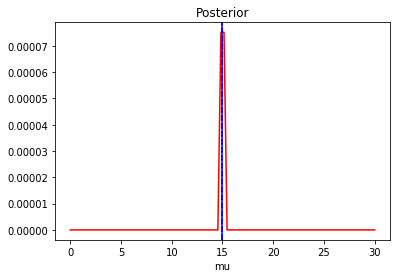

In [18]:
lmda_mu_pos = lmda_mu0 + data.size * lmda
mu_pos = (lmda_mu0 * mu0 + data.size * lmda * mu)/(lmda_mu0 + data.size * lmda)
posterior = norm(loc=mu_pos, scale=1/lmda_mu_pos)
theta = np.linspace(0,30,100)
plt.plot(theta, posterior.pdf(theta), 'r')
plt.axvline(15,color='b', linestyle='--')
plt.axvline(mu_pos, color='b')
plt.axvline(mu, color='b', linestyle = ':')
plt.title("Posterior")
plt.xlabel("mu")

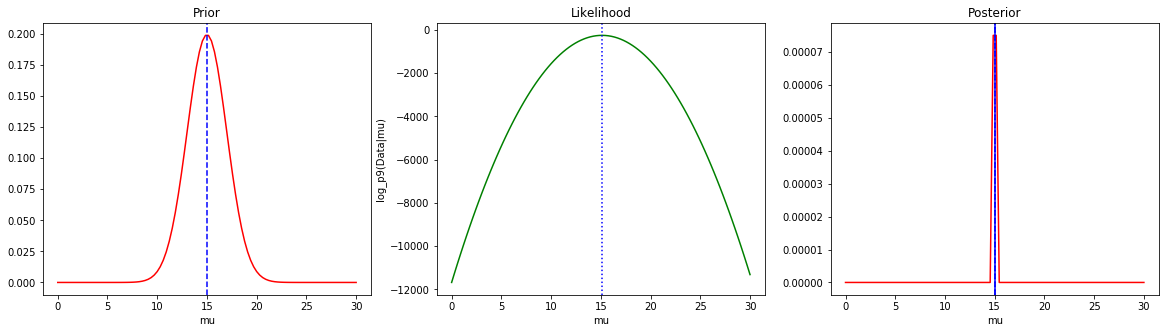

In [19]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(theta, prior.pdf(theta), 'r')
ax1.set_title('Prior')
ax1.set_xlabel('mu')
ax1.axvline(15, color='b', linestyle ='--')

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data,theta), color='g')
ax2.set_title('Likelihood')
ax2.set_xlabel('mu')
ax2.set_ylabel('log_p9(Data|mu)')
ax2.axvline(np.mean(data), color='b', linestyle = ':')

ax3 = fig.add_subplot(133)
ax3.plot(theta, posterior.pdf(theta), 'r')
ax3.set_title('Posterior')
ax3.set_xlabel('mu')
ax3.axvline(15, color='b', linestyle='--')
ax3.axvline(mu_pos, color='b')
ax3.axvline(mu, color='b', linestyle = ':')